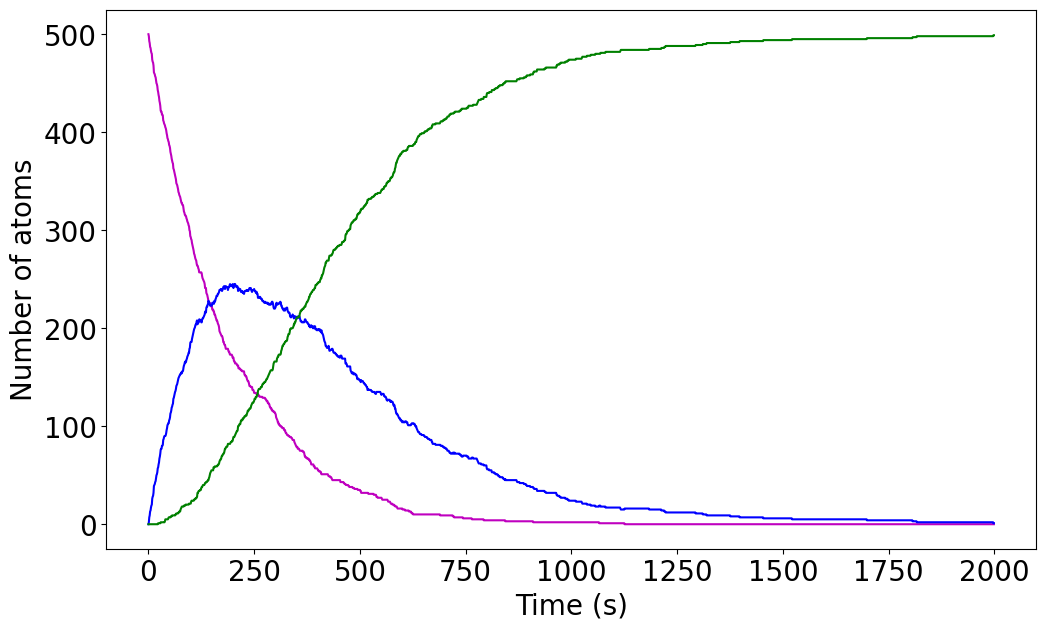

In [6]:
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import pyplot as plt

# Constants
NBi213 = 0
NTl = 500                   # Initial Number of thallium atoms
NPb = 0                    # Number of lead atoms
NBi209 = 0
tau_Tl = 2.2*60            # Half life of thallium in seconds
tau_Bi213 = 46*60
tau_Pb = 3.3*60
h = 1.0                    # Size of time-step in seconds
p_Bi213 = 1 - 2**(-h/tau_Bi213)
p_Tl = 1 - 2**(-h/tau_Tl)  # Probability of decay in one step
p_Pb = 1 - 2**(-h/tau_Pb)
tmax = 2000               # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to strore # of Tl atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step
Bi209points = []
Bi213points = []

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
    Bi209points.append(NBi209)
    Bi213points.append(NBi213)

    decay_Pb = 0
    for h in range(NPb):
        if np.random.random() < p_Pb:
            decay_Pb += 1
    NPb -= decay_Pb
    NBi209 += decay_Pb

    # Calculate the number of atoms that decay
    decay_Tl = 0
    for i in range(NTl): # determine number of atoms that decay
        if np.random.random() < p_Tl:
            decay_Tl += 1
    NTl -= decay_Tl # subtract number of decayed Parent atoms 
    NPb += decay_Tl # add number of decayed Daughter atoms 

    decay_Bi213 = 0
    for h in range(NBi213):
        if np.random.random() < p_Bi213:
            if np.random.random() < .9791:
                NPb += 1
                NBi213 -= 1
            else:
                NTl += 1
                NBi213 -= 1
                
#    NBi213 -= decay_Bi213
#    NBi209 += decay_Bi213


# Make the graph
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
ax.plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
ax.plot(tpoints,Bi209points, c='g')
# add the labels
ax.set_xlabel("Time (s)",size=20)   # allows LaTeX style formating
ax.set_ylabel("Number of atoms",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

